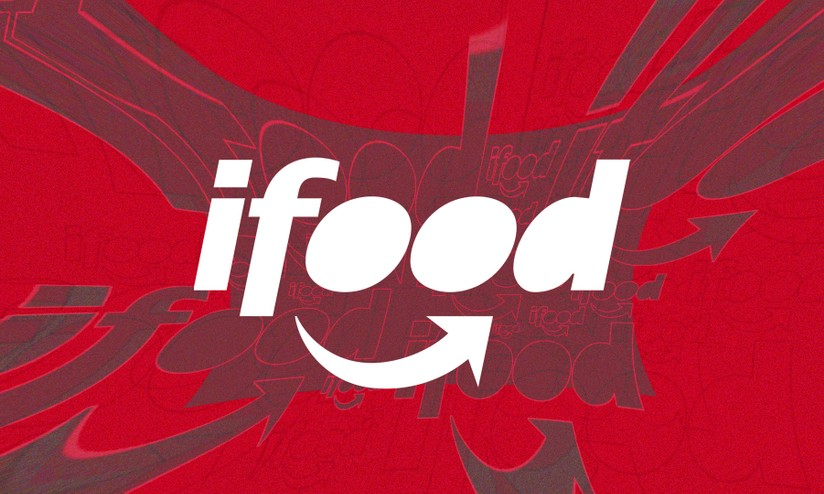

<div style="background-color: beige; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
       Importing Libraries
   </p>
</div>

In [369]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [371]:
# Import necessary libraries
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [423]:
raw_ifood_df = pd.read_csv('Data Set_Assignment1.csv', encoding='latin1')
raw_ifood_df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,Marital_Status,Education
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,1,60,2822,Single,Graduation
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,63,2272,Single,Graduation
2,71613,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,52,2471,Together,Graduation
3,26646,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,33,2298,Together,Graduation
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,36,2320,Married,PhD
5,62513,0,1,16,520,42,98,0,42,14,...,0,0,0,0,0,0,50,2452,Together,Master
6,55635,0,1,34,235,65,164,50,49,27,...,0,0,0,0,0,0,46,2752,Divorced,Graduation
7,33454,1,0,32,76,10,56,3,1,23,...,0,0,0,0,0,0,32,2576,Married,PhD
8,30351,1,0,19,14,0,24,3,3,2,...,0,0,0,0,0,1,43,2547,Together,PhD
9,5648,1,1,68,28,0,6,1,1,13,...,0,0,0,0,0,0,67,2267,Together,PhD


<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      
This dataset contains 8 rows *25 columns with: 
        
'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
'MntGoldProds', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
'marital_Divorced', 'marital_Married', 'marital_Single',
'marital_Together', 'marital_Widow', 'education_2n cycle',
'education_Basic', 'education_Graduation', 'education_Master','education_PhD'

as the dataheads which would be used with Kmeans Clustering & RANDOM FOREST for generating the insights from the data for future predictions.
   </p>
</div>


In [375]:
raw_ifood_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,0.15102,48.095692,2512.718367
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.35815,11.705801,202.563647
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,21.000000,2159.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,40.000000,2339.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,47.000000,2515.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,58.000000,2688.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,77.000000,2858.000000


<div style="background-color: beige; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
     Customer Profile Analysis
   </p>
</div>

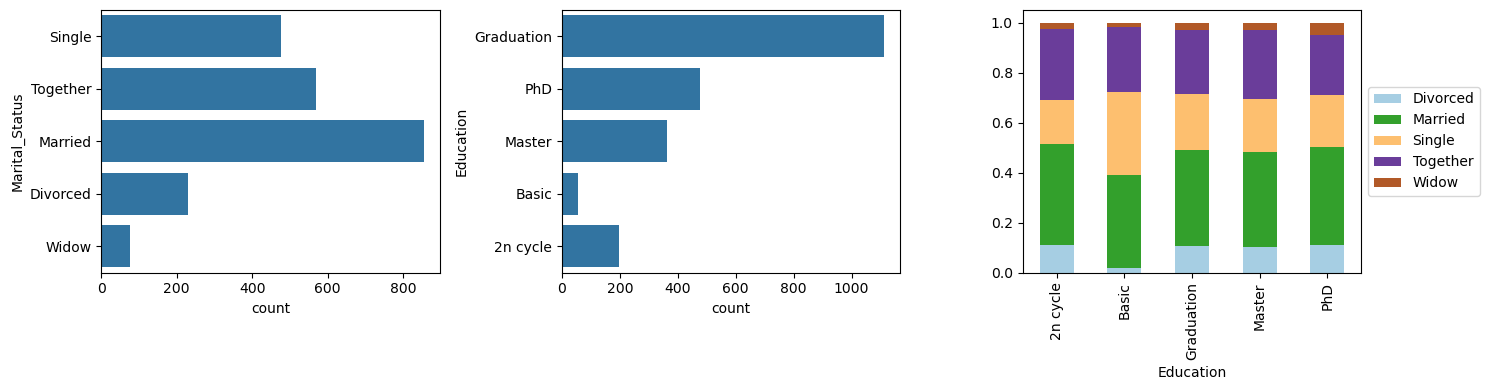

In [377]:
# Taking a look at the categorical variables
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.countplot(raw_ifood_df['Marital_Status'], ax=ax[0])
sns.countplot(raw_ifood_df['Education'], ax=ax[1])
df_plot = raw_ifood_df.groupby(['Marital_Status', 'Education']).size().reset_index().pivot(columns='Marital_Status', index='Education', values=0)
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[2],  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
fig.show()

In [378]:
df_plot

Marital_Status,Divorced,Married,Single,Together,Widow
Education,,,,,
2n cycle,22,80,35,56,5
Basic,1,20,18,14,1
Graduation,118,429,248,283,35
Master,37,138,77,101,11
PhD,52,187,99,114,24


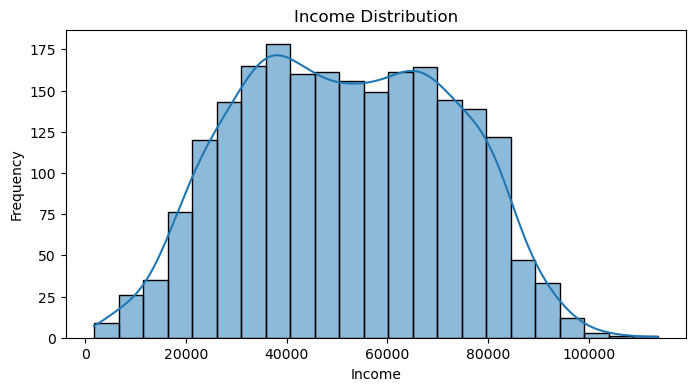

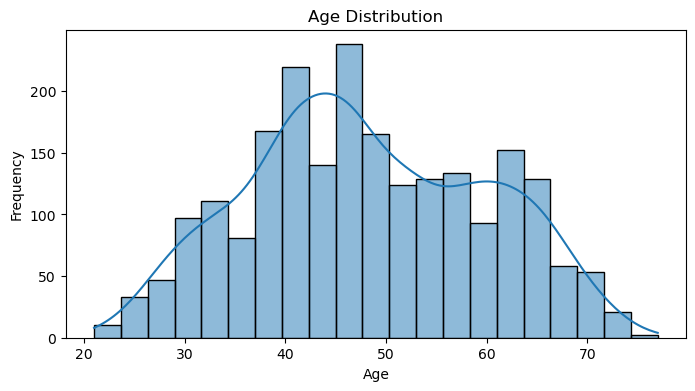

In [381]:
# Plot distribution of Income
plt.figure(figsize=(8, 4))
sns.histplot(ifood_df['Income'], kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(ifood_df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      Some transformations are required:

Education -> Education: is ordinal [Basic: 0, Graduation: 1, 2n Cycle: 2, Master: 3, PhD: 4]

Basic: boolean
Graduation: boolean
2n Cycle: boolean
Master: boolean
PhD: boolean
Marital -> multiples using Dummy Variables

Married: boolean
Together: boolean
Single, Alone, Absurd, YOLO : boolean
Divorced: boolean
Widow: boolean
   </p>
</div>

In [383]:
# Marital -> multiples using Dummy Variables
raw_ifood_df.loc[raw_ifood_df['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status']  = 'Single'
dummy_mari_var_aux = pd.get_dummies(raw_ifood_df['Marital_Status'], prefix='marital')
ifood_df = pd.concat([raw_ifood_df,dummy_mari_var_aux],axis=1)


In [385]:
# Replace Educational to an ordinal number
dummy_edu_var_aux = pd.get_dummies(raw_ifood_df['Education'], prefix='education')
ifood_df = pd.concat([ifood_df, dummy_edu_var_aux], axis=1)

# Drop unused columns
ifood_df.drop(columns=['Marital_Status','Education'], inplace=True)

# Look of the new dataset
customer_columns = ['Age', 'Income', 'Kidhome', 'Teenhome'] + dummy_mari_var_aux.columns.to_list() + dummy_edu_var_aux.columns.to_list()

customer_ifood_df = ifood_df[customer_columns]
customer_ifood_df.head()

,Age,Income,Kidhome,Teenhome,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n cycle,education_Basic,education_Graduation,education_Master,education_PhD
0,60,58138,0,0,False,False,True,False,False,False,False,True,False,False
1,63,46344,1,1,False,False,True,False,False,False,False,True,False,False
2,52,71613,0,0,False,False,False,True,False,False,False,True,False,False
3,33,26646,1,0,False,False,False,True,False,False,False,True,False,False
4,36,58293,1,0,False,True,False,False,False,False,False,False,False,True


In [389]:
# Sum of purchases
ifood_df['MntTotal'] = ifood_df.loc[:,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

# Regular Products
ifood_df['MntRegularProds'] = ifood_df.loc[:,'MntTotal'] - ifood_df.loc[:,'MntGoldProds']

# Campaigns Accepted
ifood_df['AcceptedCmpOverall'] = ifood_df.loc[:,['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

customer_columns_ext = customer_columns + ['MntTotal', 'MntRegularProds', 'MntGoldProds', 'AcceptedCmpOverall']

customer_ifood_df = ifood_df[customer_columns_ext]
customer_ifood_df.head()

,Age,Income,Kidhome,Teenhome,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,MntGoldProds,AcceptedCmpOverall
0,60,58138,0,0,False,False,True,False,False,False,False,True,False,False,1529,1441,88,0
1,63,46344,1,1,False,False,True,False,False,False,False,True,False,False,21,15,6,0
2,52,71613,0,0,False,False,False,True,False,False,False,True,False,False,734,692,42,0
3,33,26646,1,0,False,False,False,True,False,False,False,True,False,False,48,43,5,0
4,36,58293,1,0,False,True,False,False,False,False,False,False,False,True,407,392,15,0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>],
       [<Axes: title={'center': 'Teenhome'}>,
        <Axes: title={'center': 'MntTotal'}>,
        <Axes: title={'center': 'MntRegularProds'}>],
       [<Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'AcceptedCmpOverall'}>, <Axes: >]],
      dtype=object)

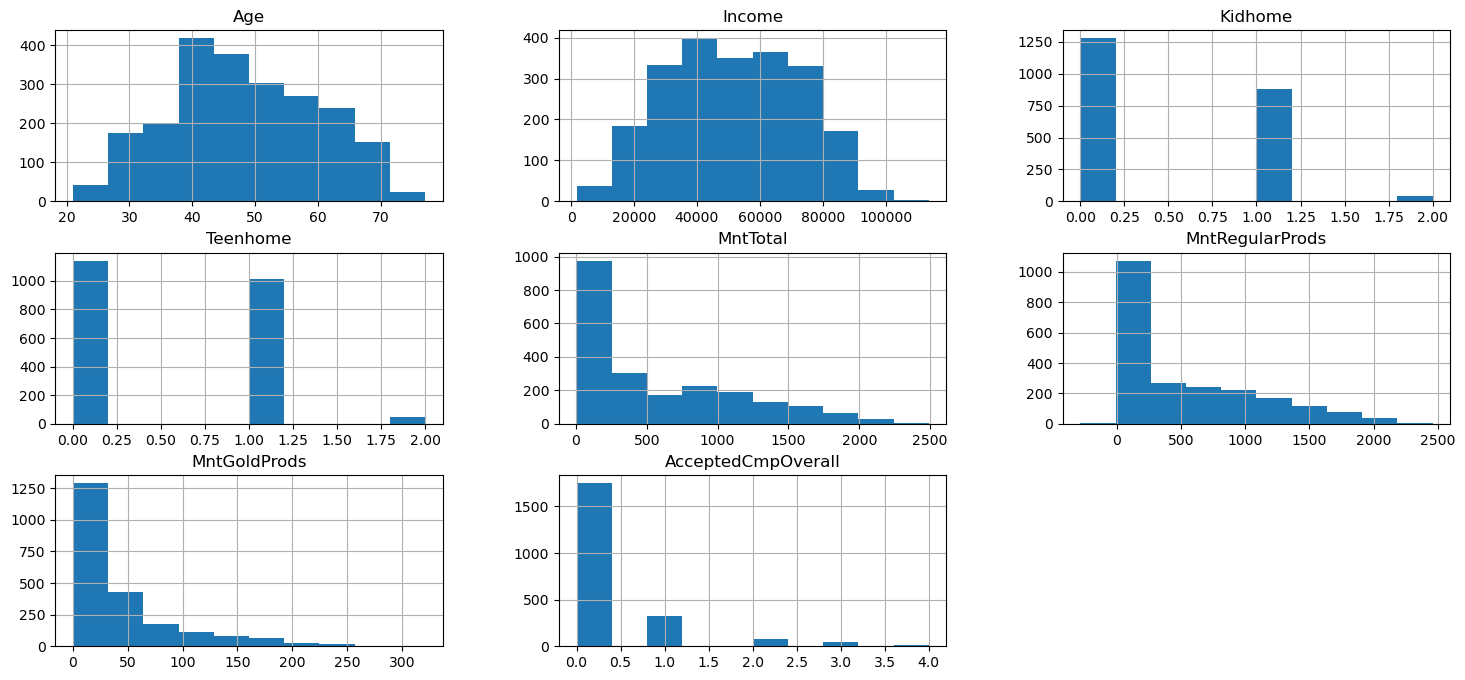

In [391]:
customer_ifood_df.hist( column = ['Age', 'Income', 'Kidhome', 'Teenhome', 'MntTotal', 'MntRegularProds', 'MntGoldProds', 'AcceptedCmpOverall'], figsize=(18,8))


<div style="background-color: beige; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
     Training the Random Forest Classifier
   </p>
</div>



Accuracy: 0.89


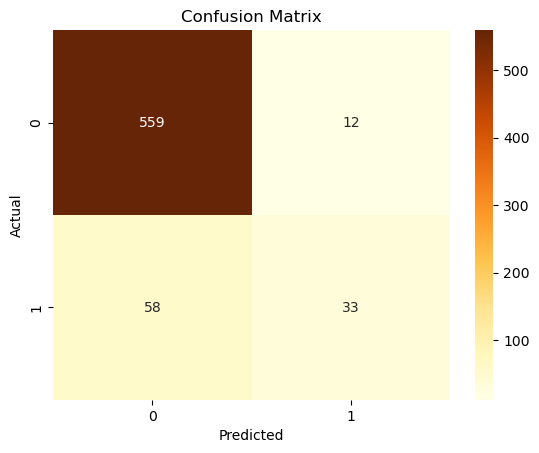

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       571
           1       0.73      0.36      0.49        91

    accuracy                           0.89       662
   macro avg       0.82      0.67      0.71       662
weighted avg       0.88      0.89      0.88       662



In [392]:
# Define features and target variable
X = ifood_df.drop(columns=['Response'])
y = ifood_df['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred))

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
    Overall Performance:

Good overall accuracy (0.89) but this is misleading due to class imbalance
The macro average (0.69) is much lower than the weighted average (0.87), which further confirms the impact of class imbalance

Potential Issues:

The model is likely biased toward predicting class 0
It's missing many actual class 1 instances (low recall of 0.34)
This could be problematic if class 1 represents important minority cases (like fraud detection)
   </p>
</div>



<div style="background-color: beige; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      Features Correlation Analysis
   </p>
</div>



In [444]:
# Calculate Spearman correlation
corr = ifood_df.corr(method='spearman')

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr), k=1).astype(bool)

# Apply mask to correlation matrix
corr_mask = corr.mask(mask)

# Unstack and sort correlations
corr_unstacked = corr_mask.unstack().dropna().sort_values(ascending=False)

<Axes: >

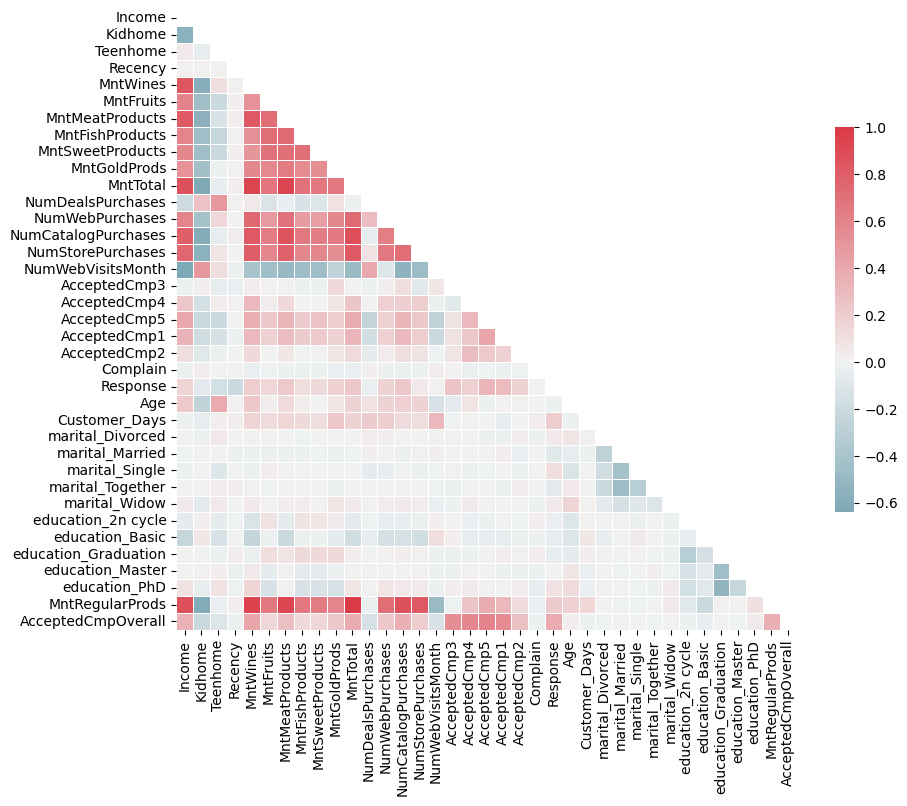

In [397]:
# Draw the heatmap with the mask and correct aspect ratio
mask = np.triu(np.ones_like(corr, dtype=bool))  # Changed np.bool to bool
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [399]:
pd.DataFrame(corr_unstacked[(abs(corr_unstacked)>0.8)&(abs(corr_unstacked)<1)]).sort_index().style.background_gradient(cmap='coolwarm', low=.5, high=-.7)

In [403]:
pd.DataFrame(corr_unstacked[corr_unstacked<-.5]).sort_index().style.background_gradient(cmap='coolwarm', low=-.6, high=.5)

<div style="background-color: navy; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
Correlation Results
        
Income is a proxy for several other features, such as the amount spend, positively driven by meat and wine and it has a negative correlation with the number of kids home and the visits on the websites.

The amount spend on Wine is, besides being related to high income, to the amount spend on Meat and it's purchased or in Catalog or in Stores.

The number of kids is negative related to income, amont spend in total and, consequently, related to wine. Higher Income is also related to accept Campaigns.
   </p>
</div>



<div style="background-color: beige; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      Segmentation of Customers
   </p>
</div>


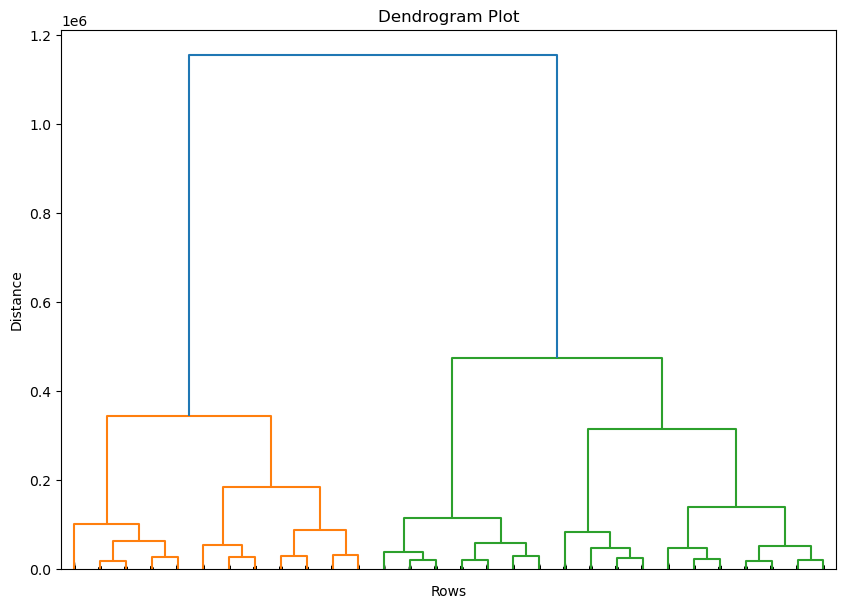

In [405]:
# Preparing data for clustering
ifood_df_clustering = ifood_df.copy()

# Create linkage matrix
input_matrix = linkage(ifood_df_clustering, method='ward')

# Create dendrogram plot
plt.figure(figsize=(10, 7))  # Added figure size for better visibility
plt.title('Dendrogram Plot')
plt.xlabel('Rows')
plt.ylabel('Distance')
dendrogram(
    input_matrix,
    truncate_mode='lastp',
    show_leaf_counts=False,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

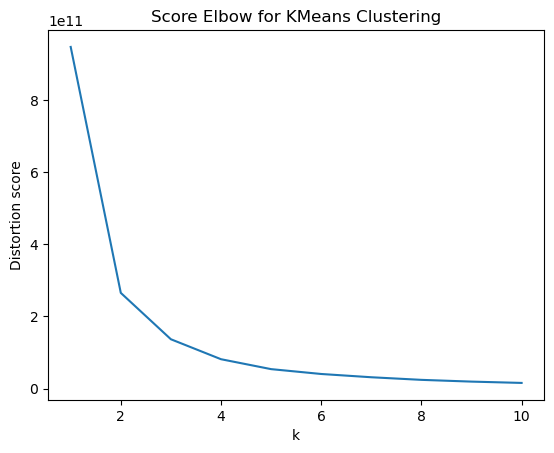

In [407]:
km_eval = []

for i in range(1,11):
    kmeans_model=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_model.fit(ifood_df_clustering)
    km_eval.append(kmeans_model.inertia_)

# Plot Kmeans for k from 1 to 10 criterion
plt.plot(range(1,11), km_eval)
plt.title('Score Elbow for KMeans Clustering')
plt.xlabel('k')
plt.ylabel('Distortion score')
plt.show()

<div style="background-color: beige; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      Fitting kmeans to the dataset with k=3
   </p>
</div>




In [409]:
# fit and predict clusters
kmeans_model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
ifood_df_clustering['cluster'] = kmeans_model.fit_predict(ifood_df_clustering)

In [411]:
ifood_df_clustering.cluster.value_counts()


cluster
2    761
1    730
0    714
Name: count, dtype: int64

array([<Axes: title={'center': 'Income'}, xlabel='cluster'>,
       <Axes: title={'center': 'Age'}, xlabel='cluster'>,
       <Axes: title={'center': 'Recency'}, xlabel='cluster'>,
       <Axes: title={'center': 'MntWines'}, xlabel='cluster'>,
       <Axes: title={'center': 'MntFruits'}, xlabel='cluster'>,
       <Axes: title={'center': 'MntMeatProducts'}, xlabel='cluster'>,
       <Axes: title={'center': 'MntFishProducts'}, xlabel='cluster'>,
       <Axes: title={'center': 'MntSweetProducts'}, xlabel='cluster'>,
       <Axes: title={'center': 'MntRegularProds'}, xlabel='cluster'>,
       <Axes: title={'center': 'MntGoldProds'}, xlabel='cluster'>,
       <Axes: title={'center': 'NumDealsPurchases'}, xlabel='cluster'>,
       <Axes: title={'center': 'NumWebPurchases'}, xlabel='cluster'>,
       <Axes: title={'center': 'NumCatalogPurchases'}, xlabel='cluster'>,
       <Axes: title={'center': 'NumStorePurchases'}, xlabel='cluster'>,
       <Axes: title={'center': 'NumWebVisitsMonth'}, xla

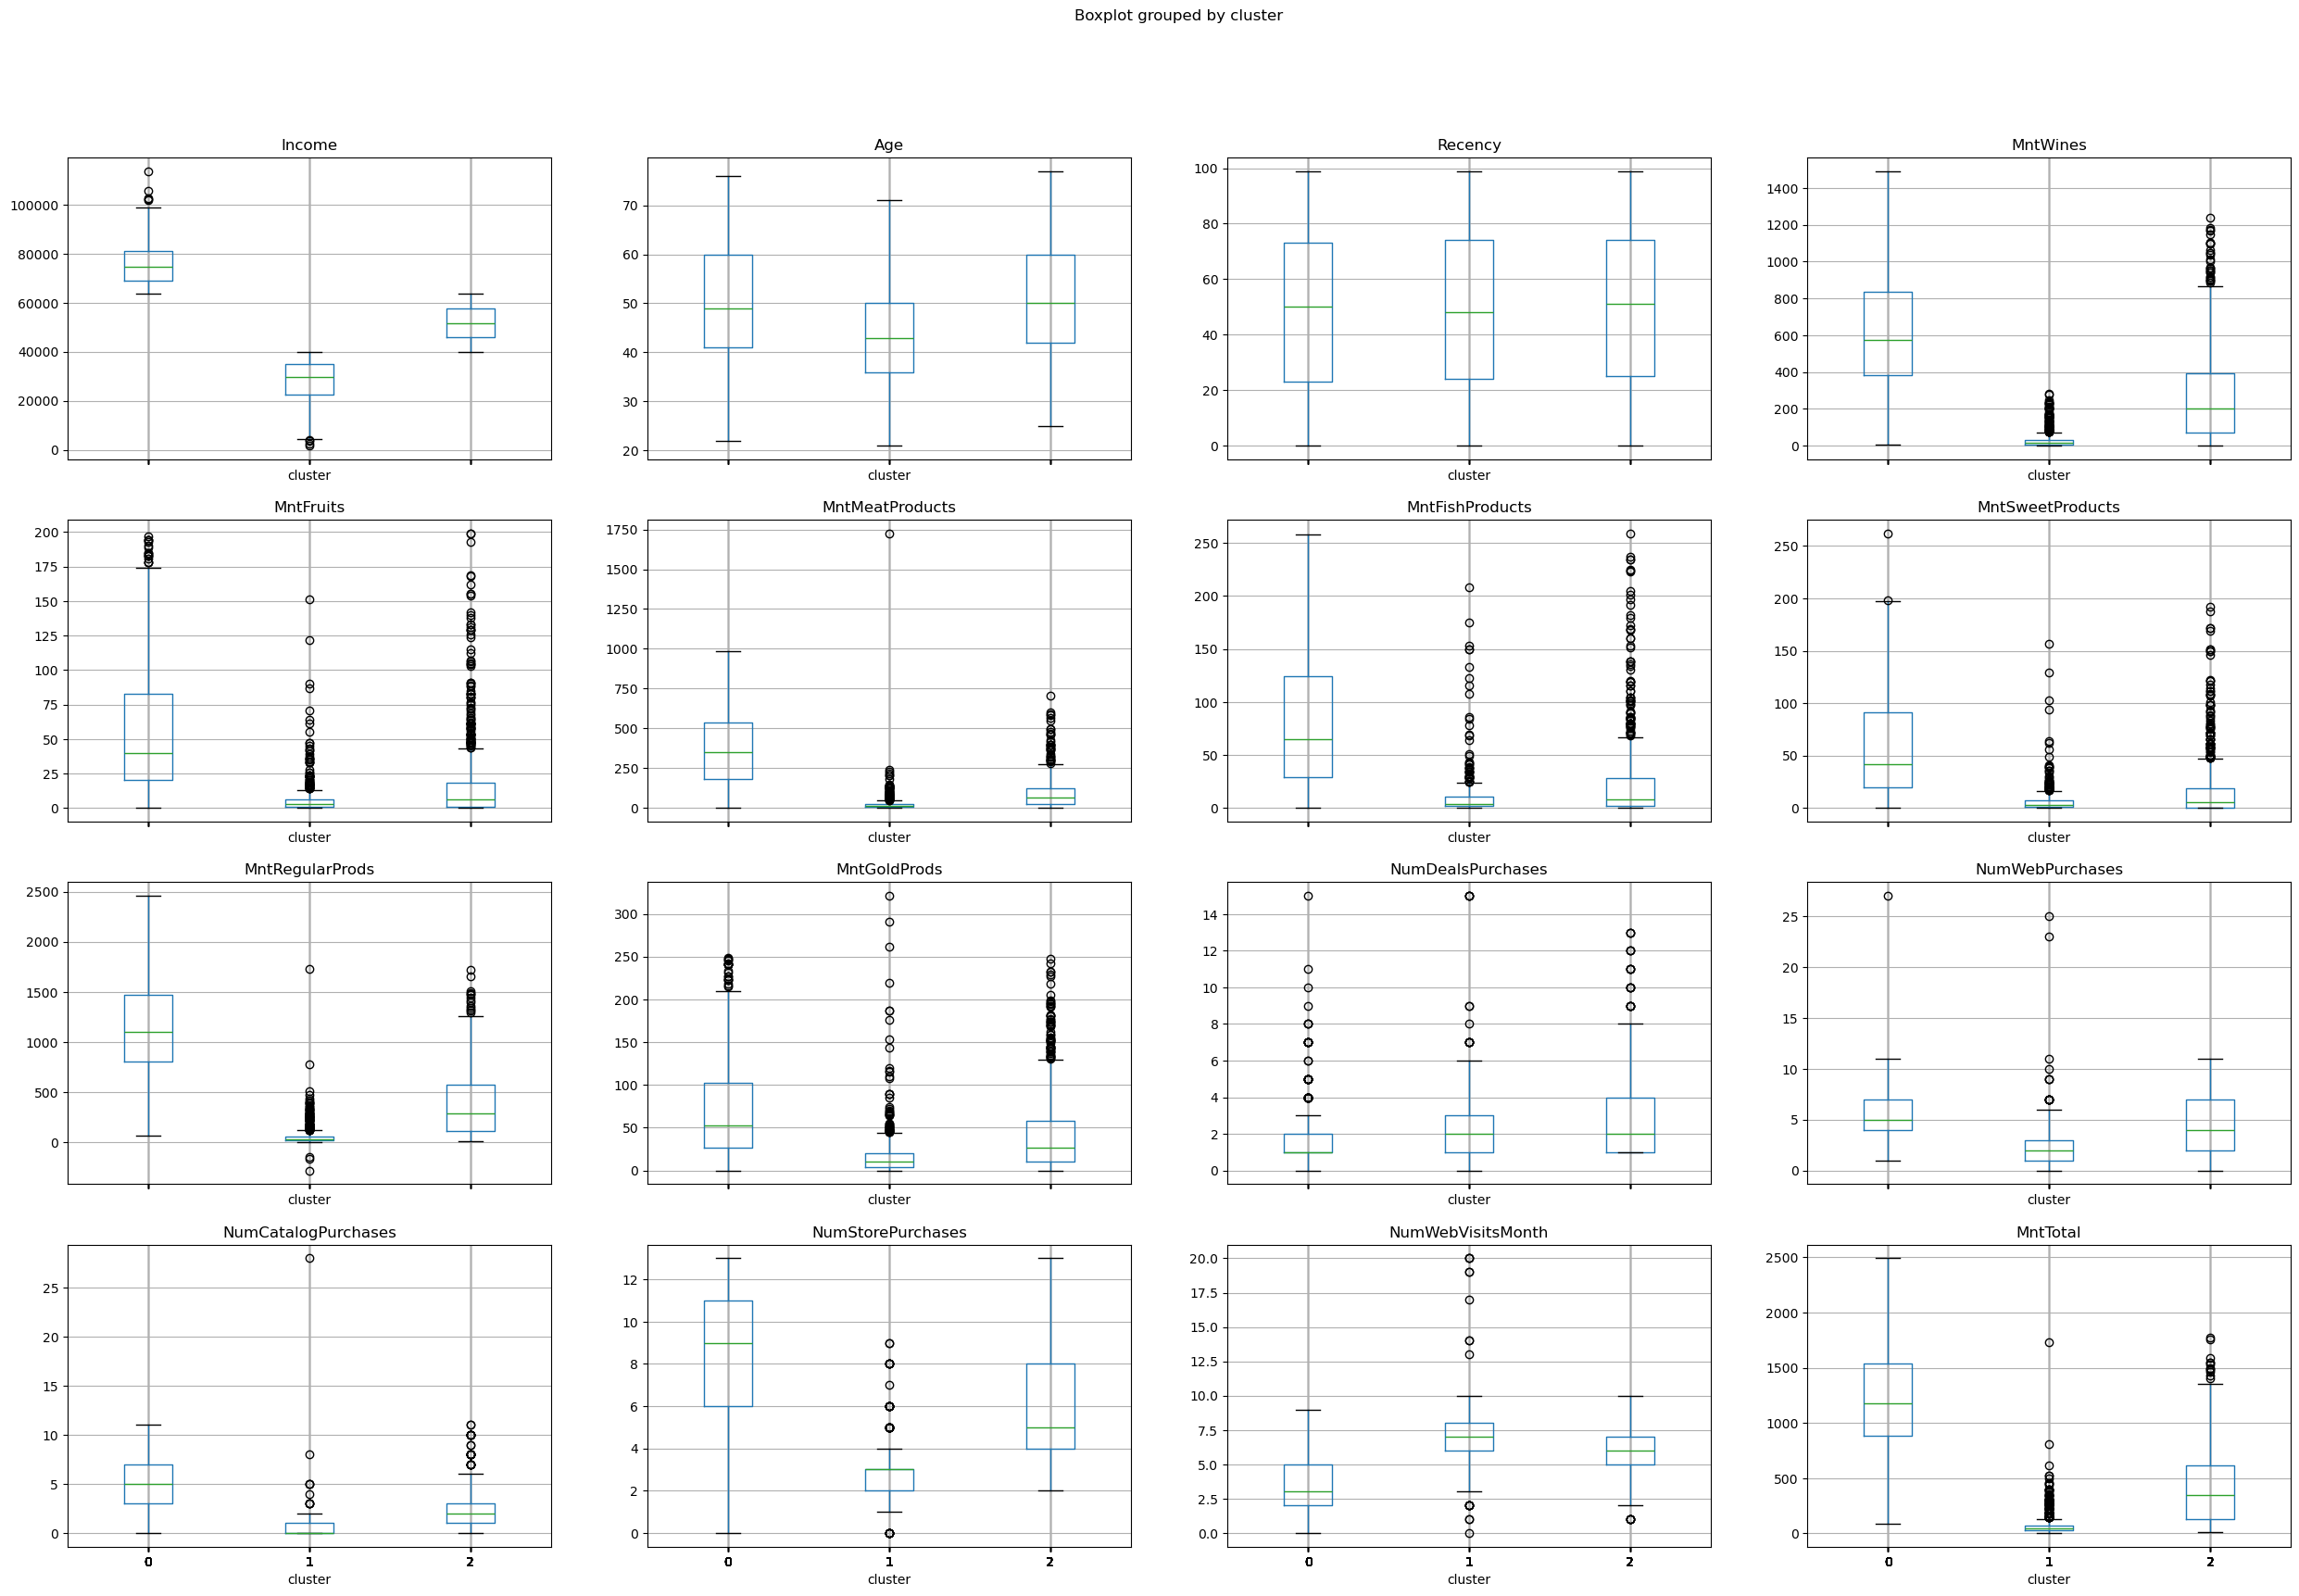

In [413]:
fig, axes = plt.subplots(4,4, sharex= True, sharey= False, figsize=(30,20))

ifood_df_clustering.boxplot(column=['Income', 'Age', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntRegularProds','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntTotal'
], ax = axes, by='cluster')

<Axes: xlabel='cluster', ylabel='count'>

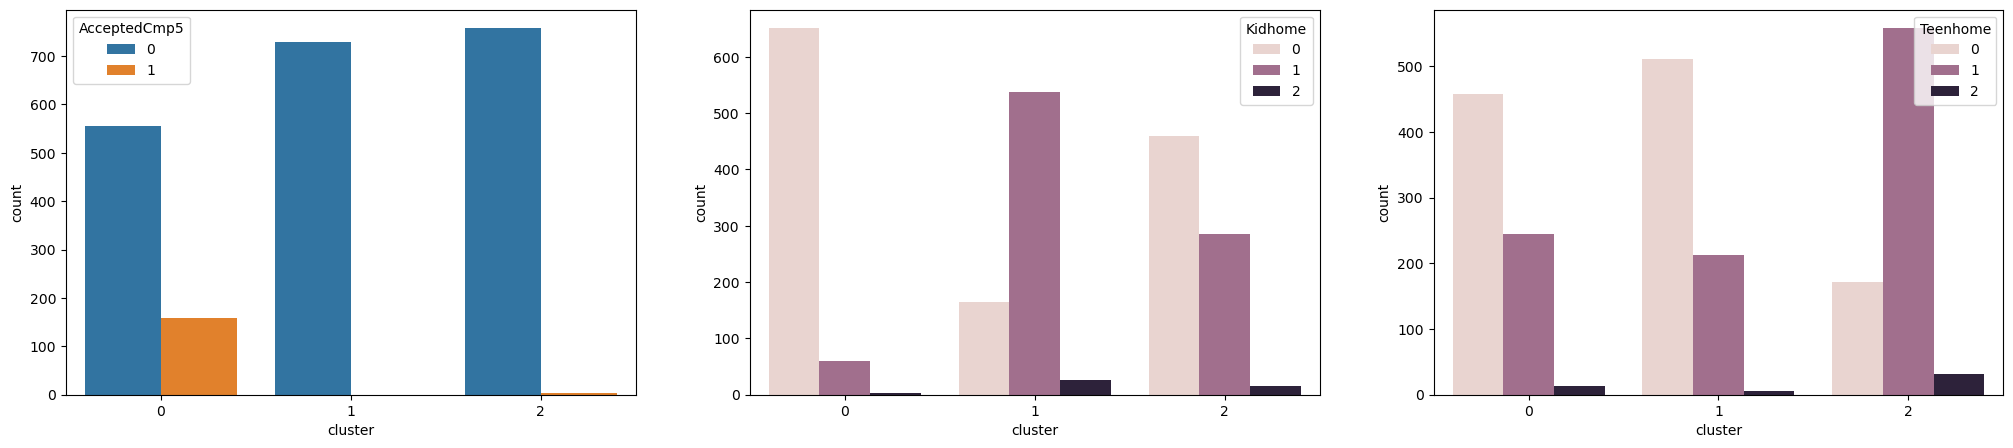

In [415]:
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.countplot(x="cluster", hue="AcceptedCmp5", data=ifood_df_clustering, ax=ax[0])
sns.countplot(x="cluster", hue="Kidhome", data=ifood_df_clustering, ax=ax[1])
sns.countplot(x="cluster", hue="Teenhome", data=ifood_df_clustering, ax=ax[2])

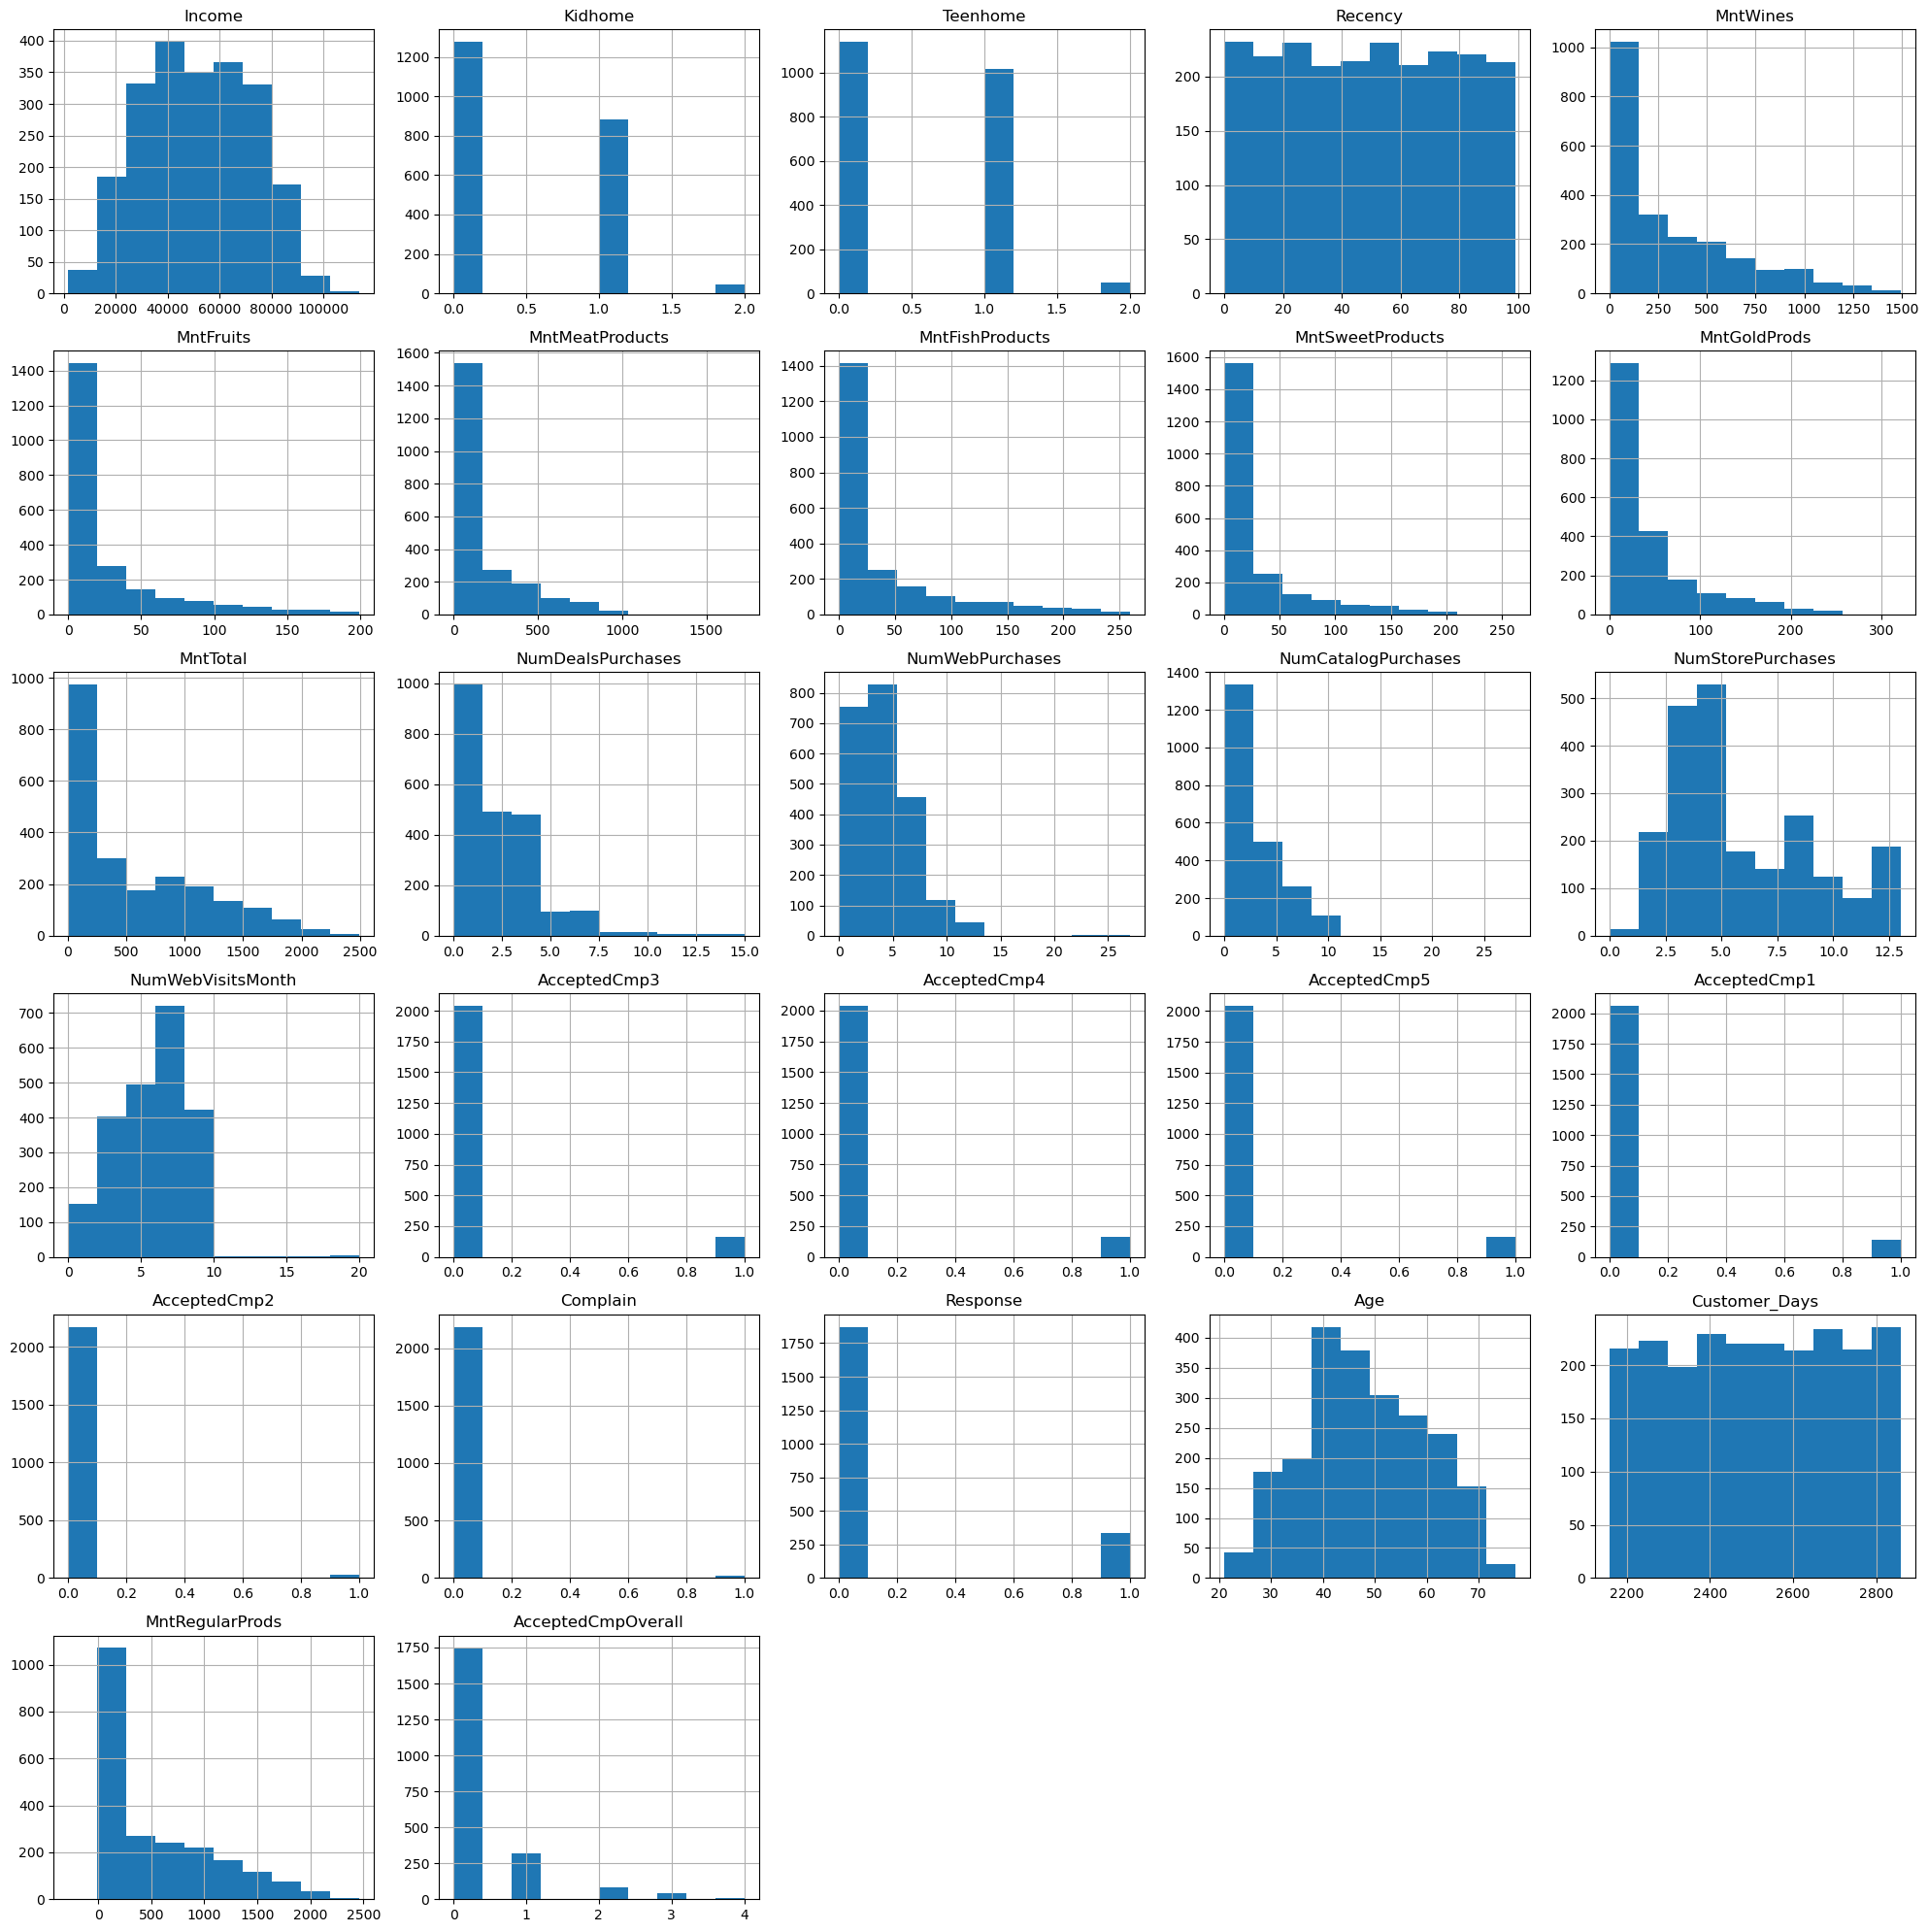

In [416]:
ifood_df.hist(figsize=(20,20))
plt.tight_layout() 
plt.show()